**CSE422 - LAB Project**



---

*`Alif Khan`*



In [ ]:

import missingno as msno
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import *
from sklearn.model_selection import *
import numpy as np


from imblearn.over_sampling import SMOTE

**Dataset:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSE422/CSE422_Project/healthcare-dataset-stroke-data.csv')

In [ ]:
print(df.shape)

(5110, 12)


In [ ]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.count()

,0
id,5110
gender,5110
age,5110
hypertension,5110
heart_disease,5110
ever_married,5110
work_type,5110
Residence_type,5110
avg_glucose_level,5110
bmi,4909


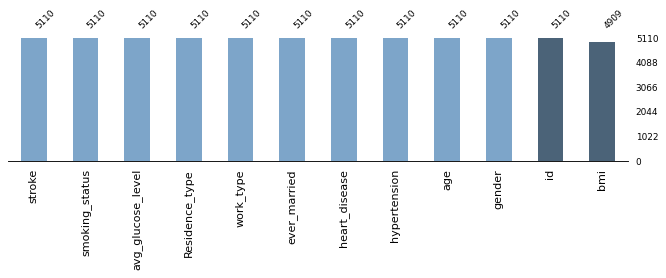

In [ ]:
A= '#7DA5C9'

color = [A, A, A, A, A, A, A, A, A, A,'#4B6378','#4B6378']
fig, ax = plt.subplots(figsize=(10, 2), dpi=80)
fig.patch.set_facecolor('#ffffff')
ax.set_facecolor('#ffffff')
msno.bar(df, sort='descending', color=color, ax=ax, fontsize=8, labels='off', filter='top')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', size=10, weight='normal',  alpha=1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)
plt.show()

Catagorical Features

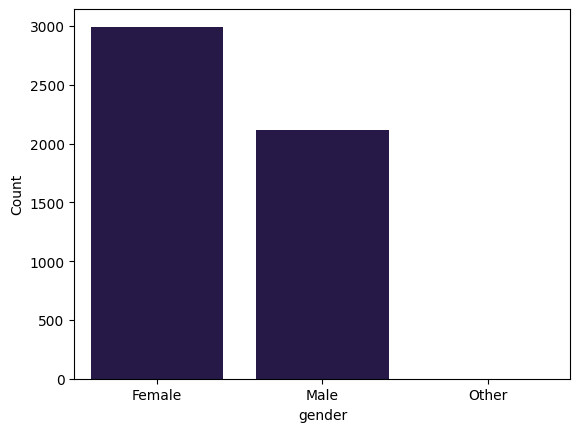

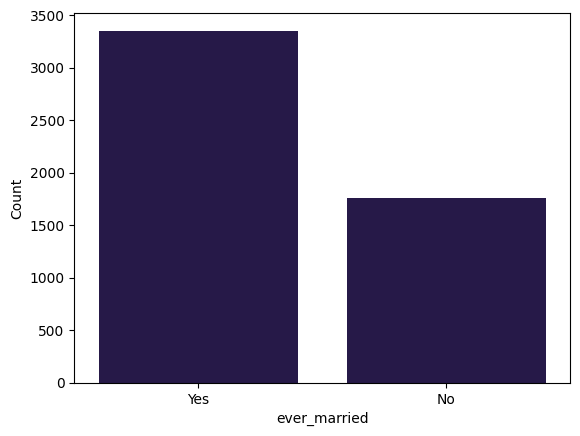

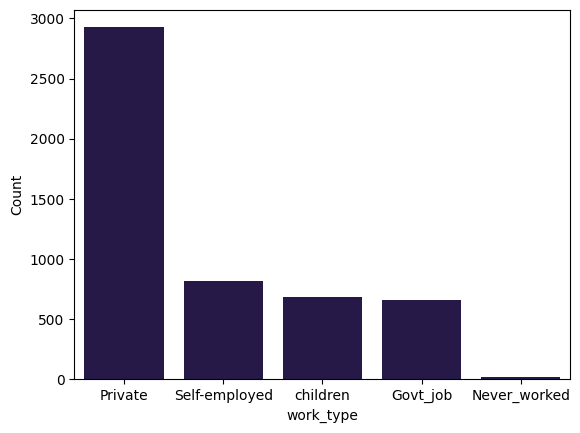

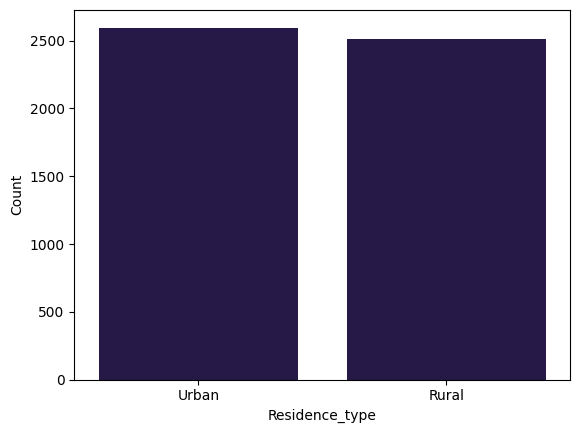

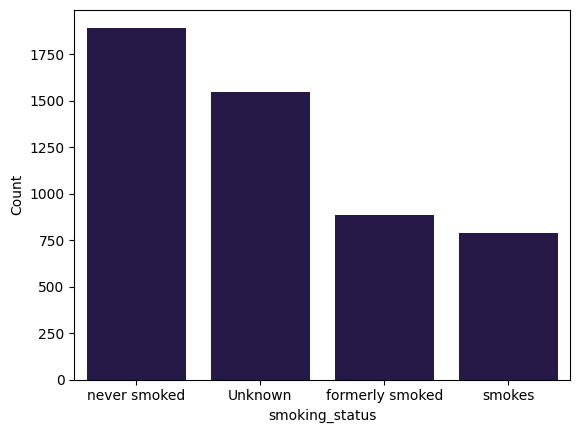

In [ ]:
category_cols = df.select_dtypes(include=['object'])
sns.set_palette('magma')
for col in category_cols:
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [ ]:
df["work_type"].value_counts()

,count
work_type,
Private,2925
Self-employed,819
children,687
Govt_job,657
Never_worked,22


In [ ]:
df["gender"].value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


In [ ]:
df["gender"]=df["gender"].map({"Male":1,"Female":0})

In [ ]:
df.count()

,0
id,5110
gender,5109
age,5110
hypertension,5110
heart_disease,5110
ever_married,5110
work_type,5110
Residence_type,5110
avg_glucose_level,5110
bmi,4909


In [ ]:
df["gender"].mean()

0.41397533763945976

In [ ]:
df["gender"]=df["gender"].fillna(df["gender"].mean())

In [ ]:
df.count()

,0
id,5110
gender,5110
age,5110
hypertension,5110
heart_disease,5110
ever_married,5110
work_type,5110
Residence_type,5110
avg_glucose_level,5110
bmi,4909


In [ ]:
df["ever_married"]=df["ever_married"].map({"Yes":1,"No":0})

In [ ]:
df.count()

,0
id,5110
gender,5110
age,5110
hypertension,5110
heart_disease,5110
ever_married,5110
work_type,5110
Residence_type,5110
avg_glucose_level,5110
bmi,4909


In [ ]:
df["bmi"]=df["bmi"].fillna(df["bmi"].mean())

In [ ]:
df = pd.get_dummies(df,columns=["work_type"])

In [ ]:
df["Residence_type"]=df["Residence_type"].map({"Urban":1,"Rural":0})

In [ ]:
df = pd.get_dummies(df,columns=["smoking_status"])

In [ ]:
df.count()

,0
id,5110
gender,5110
age,5110
hypertension,5110
heart_disease,5110
ever_married,5110
Residence_type,5110
avg_glucose_level,5110
bmi,5110
stroke,5110


In [ ]:
df=df.drop(["id"],axis=1)

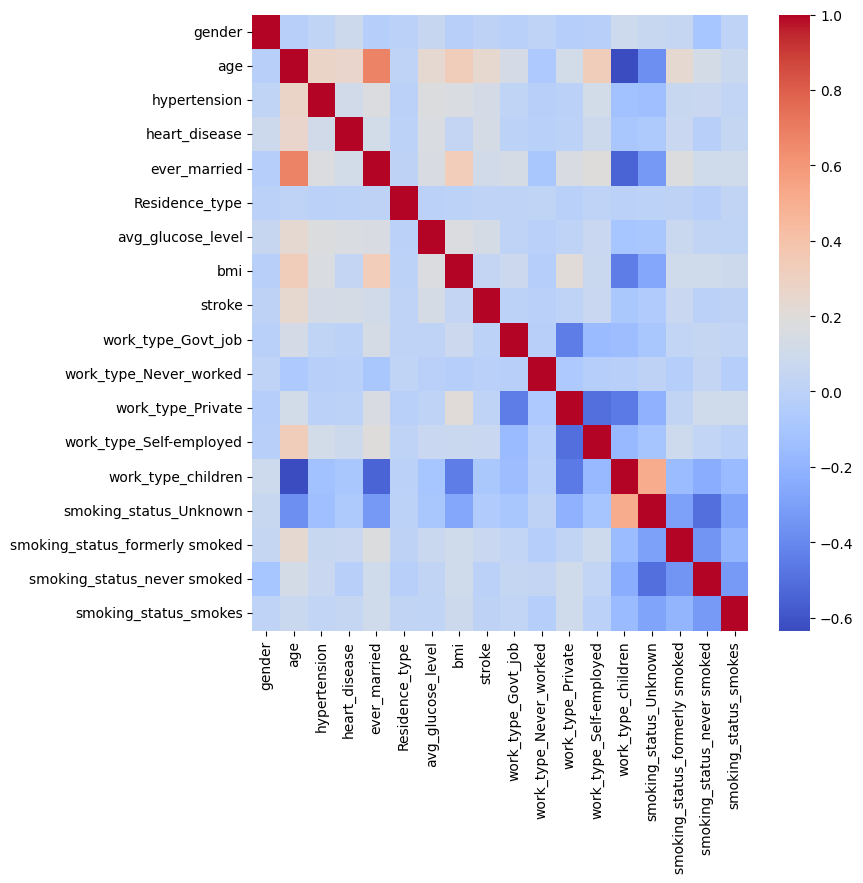

In [ ]:
import seaborn as sns
correlation=df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(correlation,cmap='coolwarm')
plt.show()

# Splitting the Features and Target & Cross validation

In [ ]:
y=df["stroke"]
X=df.drop(["stroke"],axis=1)


model1=LogisticRegression(solver="liblinear")
cross_val_score(model1,X,y,cv=10).mean()

0.9512720156555773

In [ ]:
model2=DecisionTreeClassifier()
cross_val_score(model2,X,y,cv=10).mean()

0.9091976516634052

In [ ]:
model3=RandomForestClassifier()
cross_val_score(model3,X,y,cv=10).mean()

0.9491193737769079

In [ ]:
model5=KNeighborsClassifier()
cross_val_score(model5,X,y,cv=10).mean()

0.9428571428571428

In [ ]:
y=df["stroke"]
X=df.drop(["stroke"],axis=1)

# Split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

**SMOTE for Imbalanced Classification**

In [ ]:
smote=SMOTE()
X_train,y_train=smote.fit_resample(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


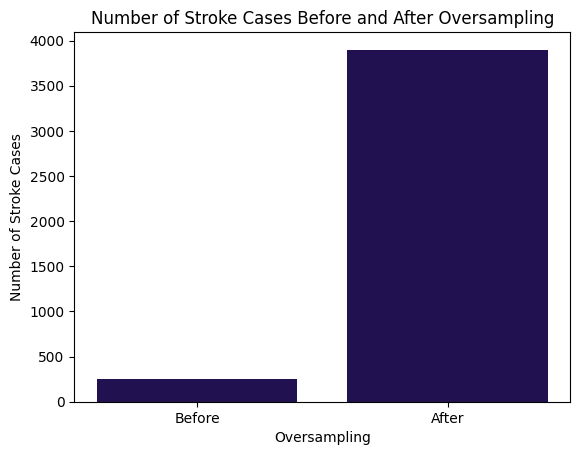

In [ ]:
num_stroke_before = y.sum()
num_stroke_after = y_train.sum()

plt.bar(['Before', 'After'], [num_stroke_before, num_stroke_after])
plt.title('Number of Stroke Cases Before and After Oversampling')
plt.xlabel('Oversampling')
plt.ylabel('Number of Stroke Cases')
plt.show()

# **Logistic regression**

In [ ]:
model_1=LogisticRegression(solver='liblinear')
model_1.fit(X_train,y_train)
y_hat=model_1.predict(X_test)

In [ ]:
v = accuracy_score(y_test,y_hat)

print('Logistic Regression :',v*100,"%")

Logistic Regression : 91.48727984344423 %


In [ ]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       962
           1       0.25      0.22      0.23        60

    accuracy                           0.91      1022
   macro avg       0.60      0.59      0.59      1022
weighted avg       0.91      0.91      0.91      1022



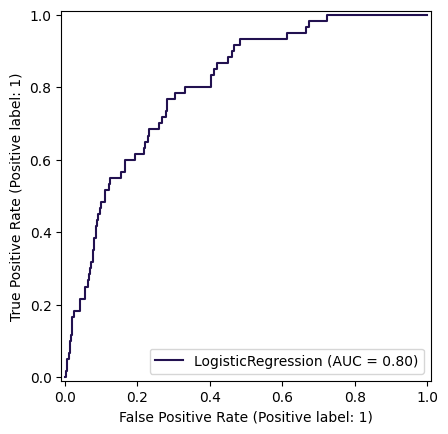

In [ ]:
RocCurveDisplay.from_estimator(model_1,X_test,y_test)

# DecisionTree

In [ ]:
model_5= DecisionTreeClassifier()
model_5.fit(X_train,y_train)
y_hat=model_5.predict(X_test)

In [ ]:
v = accuracy_score(y_test,y_hat)

print('KNN :',v*100,"%")

KNN : 88.5518590998043 %


In [ ]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       962
           1       0.14      0.18      0.16        60

    accuracy                           0.89      1022
   macro avg       0.54      0.56      0.55      1022
weighted avg       0.90      0.89      0.89      1022



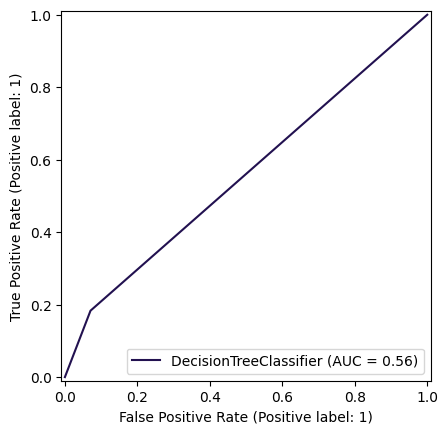

In [ ]:
RocCurveDisplay.from_estimator(model_5,X_test,y_test)

# **KnnClassifier**

In [ ]:
model_3= KNeighborsClassifier(n_neighbors = 5)
model_3.fit(X_train,y_train)
y_hat=model_3.predict(X_test)

In [ ]:
v = accuracy_score(y_test,y_hat)

print('KNN :',v*100,"%")

KNN : 79.6477495107632 %


In [ ]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88       962
           1       0.15      0.52      0.23        60

    accuracy                           0.80      1022
   macro avg       0.56      0.67      0.56      1022
weighted avg       0.92      0.80      0.84      1022



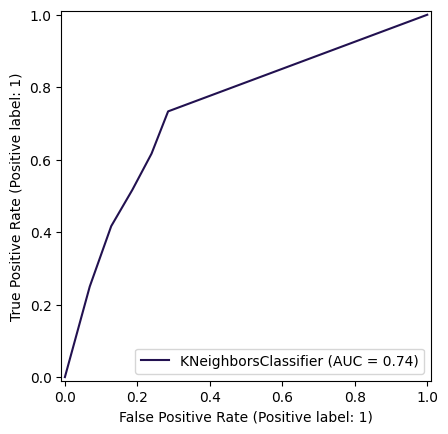

In [ ]:
RocCurveDisplay.from_estimator(model_3,X_test,y_test)

# RandomForestClassifier

In [ ]:
model_4= RandomForestClassifier()
model_4.fit(X_train,y_train)
y_hat=model_4.predict(X_test)

In [ ]:
v = accuracy_score(y_test,y_hat)

print('RandomForestClassifier:',v*100,"%")

RandomForestClassifier: 92.75929549902152 %


In [ ]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       962
           1       0.15      0.05      0.07        60

    accuracy                           0.93      1022
   macro avg       0.55      0.52      0.52      1022
weighted avg       0.90      0.93      0.91      1022



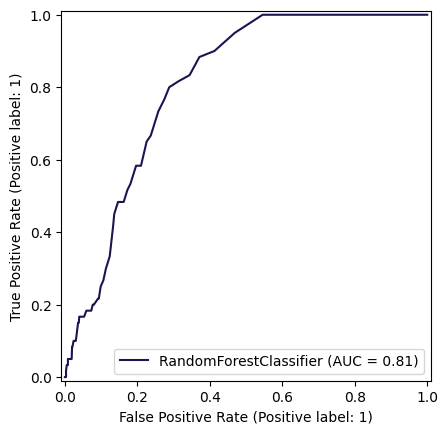

In [ ]:
RocCurveDisplay.from_estimator(model_4,X_test,y_test)

In [ ]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       962
           1       0.15      0.05      0.07        60

    accuracy                           0.93      1022
   macro avg       0.55      0.52      0.52      1022
weighted avg       0.90      0.93      0.91      1022



In [ ]:
models = {
    "Logistic Regression": 89.87327188940093,
    "K-Nearest Neighbors": 84.04377880184332,
    "Decision Tree": 95.26497695852535,
    "Random Forest": 97.38479262672811,

}

name = list(models.keys())
accu = list(models.values())
error = []
for i in list(models.values()):
  error.append(100-i)

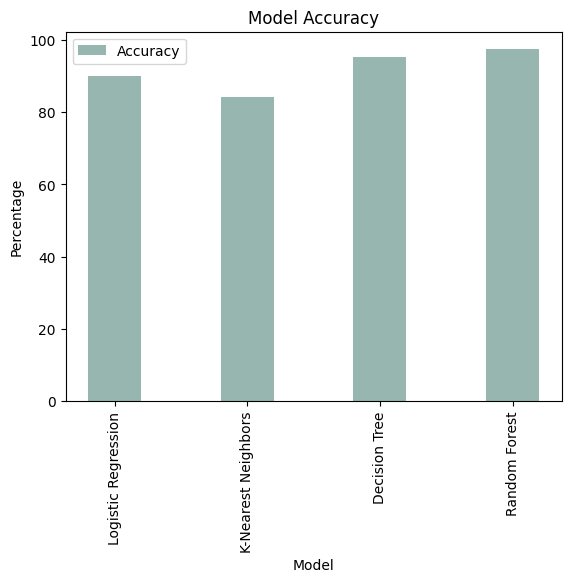

In [ ]:
plt.bar(name, accu, label='Accuracy', color='#96b6af', width = 0.4)
plt.xlabel('Model')
plt.ylabel('Percentage')
plt.title('Model Accuracy')
plt.xticks(rotation=90)
plt.legend()
plt.show()

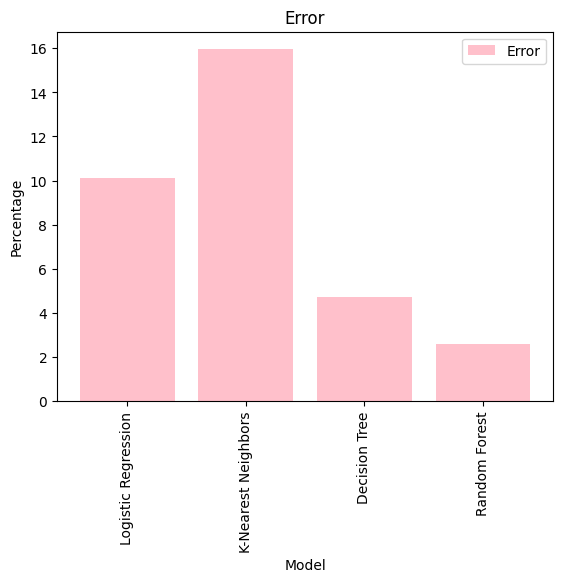

In [ ]:
plt.bar(name, error , label='Error', color='pink')
plt.xlabel('Model')
plt.ylabel('Percentage')
plt.title('Error')
plt.xticks(rotation=90)
plt.legend()
plt.show()